In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OVoloneatV0/'
TrainModelName = 'Yolov0oneat.npz'
ValidationModelName = 'Yolov0oneatVal.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ResidualBin2NeatModel.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters
#For ORNET use residual = True and for OSNET use residual = False
#Neural network parameters
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29


#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250




In [3]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = 1, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='ResidualBin2NeatModel.h5', batch_size=100, box_vector=4, categories=4, depth=29, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=1, residual=True, start_kernel=3, startfilter=32)


number of  images:	 24466
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1288
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 24466 samples, validate on 1288 samples
Epoch 1/250
24466/24466 [==============================] - 40s 2ms/step - loss: 2.3259 - acc: 0.1899 - val_loss: 2.0688 - val_acc: 0.2104

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 2.0688433473154624, 'val_acc': 0.2104037299011805, 'loss': 2.325857685630226, 'acc': 0.18993705533475944, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

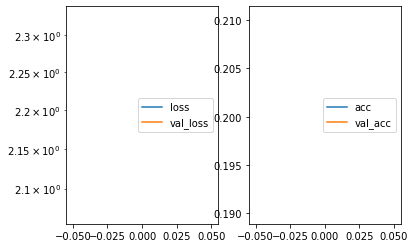

Prediction : [[[0.04349981 0.29026476 0.39515695 0.27107847 0.76692605 0.888771
   0.41605633 0.4045715 ]]]
True Label :  [0.         0.         1.         0.         0.87037037 0.87037037
 0.31481481 0.31481481]


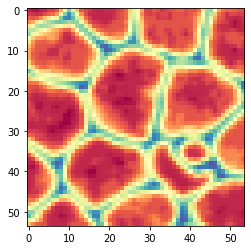

Epoch 2/250
24466/24466 [==============================] - 32s 1ms/step - loss: 1.8352 - acc: 0.4320 - val_loss: 1.7010 - val_acc: 0.6134

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.7009899334877914, 'val_acc': 0.6133540298627771, 'loss': 1.8352138985989577, 'acc': 0.43198724583535597, 'lr': 1e-04}


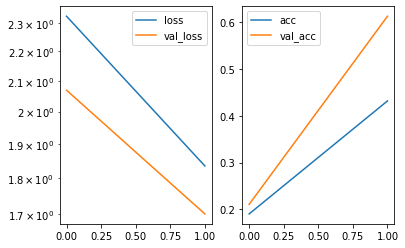

Prediction : [[[0.01619014 0.16764452 0.57130146 0.24486388 0.59159666 0.8973907
   0.47730872 0.36684054]]]
True Label :  [0.         0.         1.         0.         0.5        0.12962963
 0.40740741 0.27777778]


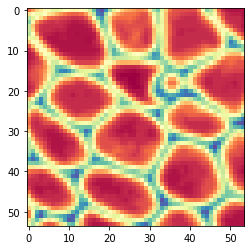

Epoch 3/250
24466/24466 [==============================] - 32s 1ms/step - loss: 1.6065 - acc: 0.6695 - val_loss: 1.5456 - val_acc: 0.7655

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.545609126179855, 'val_acc': 0.7655279540127109, 'loss': 1.6064892510288844, 'acc': 0.6695005343851625, 'lr': 1e-04}


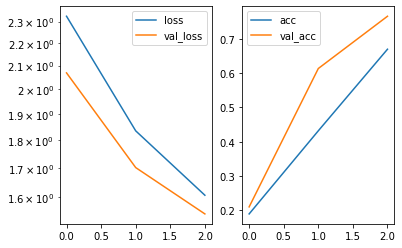

Prediction : [[[0.01638113 0.17843074 0.71434057 0.09084749 0.3560342  0.8543985
   0.5167916  0.5531887 ]]]
True Label :  [0.         0.         0.         1.         0.87037037 0.5
 0.37037037 0.38888889]


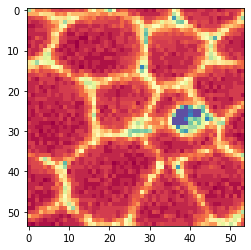

Epoch 4/250
24466/24466 [==============================] - 31s 1ms/step - loss: 1.4900 - acc: 0.7890 - val_loss: 1.4885 - val_acc: 0.8354

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.4884869197140569, 'val_acc': 0.8354037326315175, 'loss': 1.4899900860966913, 'acc': 0.7889724473653884, 'lr': 1e-04}


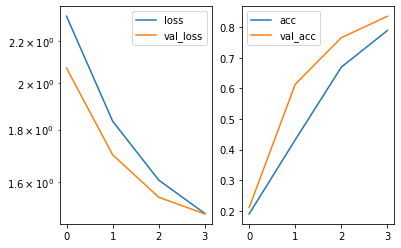

Prediction : [[[0.03055919 0.0166783  0.89407724 0.05868531 0.38231882 0.86267066
   0.49918097 0.561403  ]]]
True Label :  [0.         0.         0.         1.         0.87037037 0.5
 0.40740741 0.37037037]


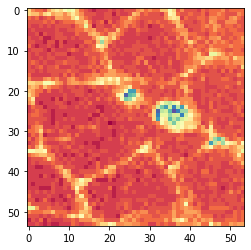

Epoch 5/250
24466/24466 [==============================] - 32s 1ms/step - loss: 1.4135 - acc: 0.8546 - val_loss: 1.4137 - val_acc: 0.9022

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.4137288369006993, 'val_acc': 0.9021739148945542, 'loss': 1.4135382008223174, 'acc': 0.85457369377478, 'lr': 1e-04}


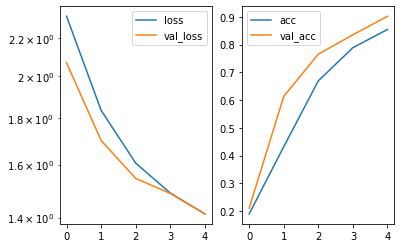

Prediction : [[[0.09685748 0.01651078 0.8489848  0.03764693 0.29904616 0.77254784
   0.45315143 0.5440756 ]]]
True Label :  [0.         0.         0.         1.         0.5        0.12962963
 0.31481481 0.33333333]


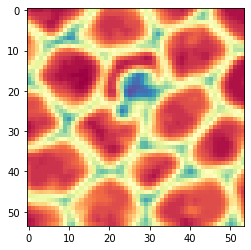

Epoch 6/250
24466/24466 [==============================] - 32s 1ms/step - loss: 1.3666 - acc: 0.8974 - val_loss: 1.3725 - val_acc: 0.9185

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.372465735636883, 'val_acc': 0.91847826049935, 'loss': 1.3666078177728609, 'acc': 0.8974086509150067, 'lr': 1e-04}


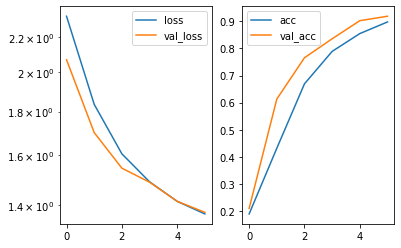

Prediction : [[[0.07995839 0.00094489 0.90875524 0.01034153 0.34018505 0.7727951
   0.4495818  0.534462  ]]]
True Label :  [0.         0.         0.         1.         0.12962963 0.12962963
 0.33333333 0.35185185]


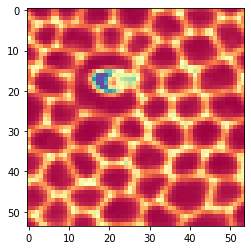

Epoch 7/250
24466/24466 [==============================] - 32s 1ms/step - loss: 1.3385 - acc: 0.9207 - val_loss: 1.4149 - val_acc: 0.9030

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.41486808824243, 'val_acc': 0.9029503064866392, 'loss': 1.338539939611568, 'acc': 0.9207471608433458, 'lr': 1e-04}


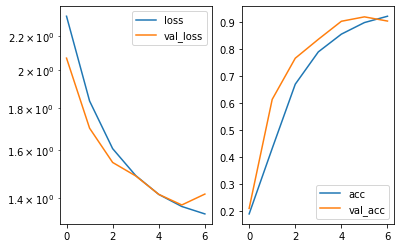

Prediction : [[[3.8853250e-02 8.2286635e-05 9.5868719e-01 2.3772737e-03 3.5709220e-01
   6.9610745e-01 4.9128827e-01 5.9296119e-01]]]
True Label :  [0.         1.         0.         0.         0.12962963 0.5
 0.62962963 0.5       ]


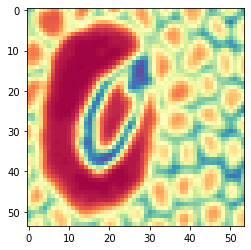

Epoch 8/250
24466/24466 [==============================] - 32s 1ms/step - loss: 1.3194 - acc: 0.9355 - val_loss: 1.3564 - val_acc: 0.9418

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.3563582911994887, 'val_acc': 0.9417701915184163, 'loss': 1.3193681194865479, 'acc': 0.9354614580115127, 'lr': 1e-04}


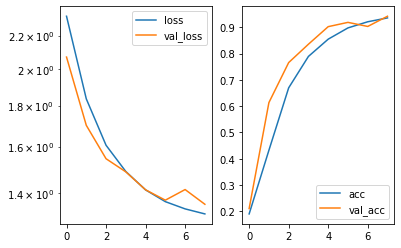

Prediction : [[[1.1008064e-01 8.8642444e-04 8.8721323e-01 1.8196906e-03 2.3639876e-01
   7.0489860e-01 5.7601768e-01 5.6997180e-01]]]
True Label :  [0.         1.         0.         0.         0.12962963 0.5
 0.5        0.96296296]


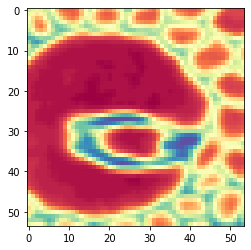

Epoch 9/250
24466/24466 [==============================] - 32s 1ms/step - loss: 1.3061 - acc: 0.9442 - val_loss: 1.3427 - val_acc: 0.9457

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.3427171270299403, 'val_acc': 0.9456521702108917, 'loss': 1.306085900849921, 'acc': 0.9442082904525899, 'lr': 1e-04}


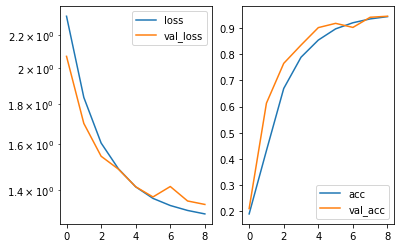

Prediction : [[[1.2652473e-01 7.0362515e-04 8.7131238e-01 1.4592918e-03 3.3178800e-01
   7.2492635e-01 5.2191532e-01 5.5653405e-01]]]
True Label :  [0.         0.         0.         1.         0.12962963 0.5
 0.44444444 0.42592593]


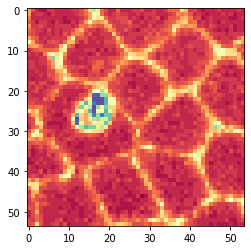

Epoch 10/250
24466/24466 [==============================] - 32s 1ms/step - loss: 1.2932 - acc: 0.9536 - val_loss: 1.3437 - val_acc: 0.9402

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.3437330289657072, 'val_acc': 0.9402173974128983, 'loss': 1.2931809332485162, 'acc': 0.953649964135149, 'lr': 1e-04}


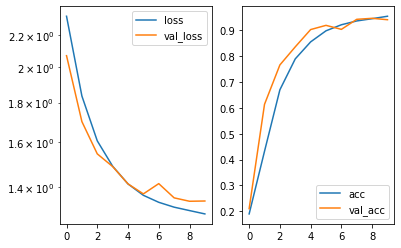

Prediction : [[[4.9499199e-02 3.5231700e-05 9.4947332e-01 9.9227985e-04 3.9865676e-01
   6.9263589e-01 5.0602227e-01 5.8013433e-01]]]
True Label :  [0.         0.         1.         0.         0.12962963 0.5
 0.31481481 0.24074074]


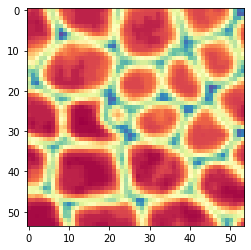

Epoch 11/250
24466/24466 [==============================] - 31s 1ms/step - loss: 1.2823 - acc: 0.9595 - val_loss: 1.3336 - val_acc: 0.9488

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.333604613816516, 'val_acc': 0.9487577665666616, 'loss': 1.2822607710834497, 'acc': 0.9594539418532746, 'lr': 1e-04}


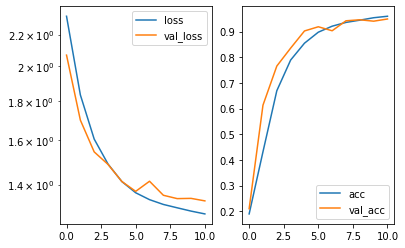

Prediction : [[[7.7338360e-02 1.3543798e-04 9.2150402e-01 1.0221610e-03 3.1656212e-01
   7.1153355e-01 5.0658053e-01 5.6986606e-01]]]
True Label :  [0.         1.         0.         0.         0.5        0.5
 0.31481481 0.42592593]


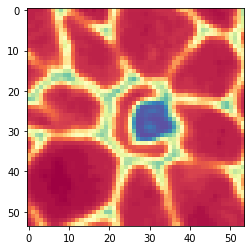

Epoch 12/250
24466/24466 [==============================] - 31s 1ms/step - loss: 1.2729 - acc: 0.9656 - val_loss: 1.3295 - val_acc: 0.9519

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.3295443202397839, 'val_acc': 0.9518633582947417, 'loss': 1.2728646187831791, 'acc': 0.9655849003181779, 'lr': 1e-04}


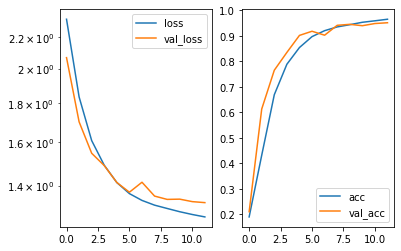

Prediction : [[[4.3109115e-02 2.1242757e-05 9.5660317e-01 2.6655864e-04 2.5843263e-01
   6.8386537e-01 5.1133746e-01 5.9231275e-01]]]
True Label :  [0.         1.         0.         0.         0.12962963 0.5
 0.57407407 0.62962963]


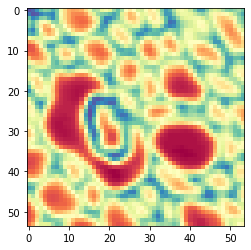

Epoch 13/250
16100/24466 [==================>...........] - ETA: 10s - loss: 1.2664 - acc: 0.9667

KeyboardInterrupt: 

In [4]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
